In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contractions
from wordcloud import STOPWORDS

# Seth Godin's Blog Dataset - EDA

In [114]:
dataset = pd.read_csv('../data/seth-data.csv')

dataset.head()

,Unnamed: 0,id,url,title,content_plain,content_html,stars,publication-date,referral-url
0,0,24220,https://seths.blog/2002/01/free_signed_cop/,Free Signed Copy of SURVIVAL IS NOT ENOUGH,Don’t know if you read the column I wrote abo...,Don’t know if you read the column I wrote abo...,104,"January 17, 2002",https://seths.blog/page/742/
1,1,24221,https://seths.blog/2002/01/free_ebook_buy_/,Free eBook,Buy a copy of the new paperback edition of Th...,Buy a copy of the new paperback edition of Th...,145,NaN,https://seths.blog/page/742/
2,2,24222,https://seths.blog/2002/01/free_quiz_find_/,Free Quiz,Find out if you zoom. My friend Red did an am...,Find out if you zoom. My friend Red did an am...,112,NaN,https://seths.blog/page/742/
3,3,24223,https://seths.blog/2002/01/thanks_survival/,Thanks,Survival is Not Enough. hit #4 on the Denver ...,Survival is Not Enough. hit #4 on the Denver ...,140,NaN,https://seths.blog/page/742/
4,4,24224,https://seths.blog/2002/01/boring_i_was_st/,Boring,I was stranded today. I had to spend hours in ...,I was stranded today. I had to spend hours in ...,618,"January 15, 2002",https://seths.blog/page/742/


In [115]:
dataset = dataset[dataset['content_plain'].notna()]

dataset = dataset[['content_plain']]

## Data Cleaning

In [116]:
contractions.add("we'll", 'we will')
contractions.add("I 've", 'I have')
contractions.add("I'v'e", 'I have')

In [117]:
dataset['content_plain'] = dataset['content_plain'].str.lower()

dataset['content_plain'] = dataset['content_plain'].str.replace('’', "'")
dataset['content_plain'] = dataset['content_plain'].str.replace("'s ", " ")
dataset['content_plain'] = dataset['content_plain'].str.replace("'s\.", ".")
dataset['content_plain'] = dataset['content_plain'].str.replace("'s,", ',')
dataset['content_plain'] = dataset['content_plain'].str.replace("'s:", ':')

dataset['content_plain'] = dataset['content_plain'].apply(lambda post: contractions.fix(post))

dataset['content_plain'] = dataset['content_plain'].str.replace("n't", 'nt')
dataset['content_plain'] = dataset['content_plain'].str.replace("'", ' ')

dataset['content_plain'] = dataset['content_plain'].str.replace('‘', " ")
dataset['content_plain'] = dataset['content_plain'].str.replace('“', ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace('”', ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace('"', ' ')

dataset['content_plain'] = dataset['content_plain'].str.replace('[', '(')
dataset['content_plain'] = dataset['content_plain'].str.replace(']', ')')

dataset['content_plain'] = dataset['content_plain'].str.replace('\.\.\.', ' [END] ')
dataset['content_plain'] = dataset['content_plain'].str.replace('\.\.', ' [END] ')
dataset['content_plain'] = dataset['content_plain'].str.replace('…', ' [END] ')
dataset['content_plain'] = dataset['content_plain'].str.replace('?', ' [END] ')

dataset['content_plain'] = dataset['content_plain'].str.replace('—', '-')

dataset['content_plain'] = dataset['content_plain'].str.replace('non-profit', "nonprofit", regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('wal-mart', "walmart", regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('never-ending', "neverending", regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('co-worker', "coworker", regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('t-shirt', "tshirt", regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('e-mail', 'email', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('pre-order', 'preorder', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('short-sighted', 'shortsighted', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('non-fiction', 'nonfiction', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('world-class', 'worldclass', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('low-cost', 'lowcost', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('high-end', 'highend', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('hard-working', 'hardworking', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('long-term', 'longterm', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('short-term', 'shortterm', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('permission-based', 'permissionbased', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('high-value', 'highvalue', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('old-school', 'oldschool', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('old-fashion', 'oldfashion', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('year-old', 'yearold', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('money-back', 'moneyback', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('real-life', 'reallife', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('real-time', 'realtime', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('time-consuming', 'timeconsuming', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('one-way', 'oneway', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('fast-moving', 'fastmoving', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('fast-growing', 'fastgrowing', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('fast-growing', 'fastgrowing', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('full-time', 'fulltime', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('well-known', 'wellknown', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('well-mean', 'wellmean', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('self-eestem', 'selfeestem', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('self-fullfil', 'selffullfil', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('well-design', 'welldesign', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('last-min', 'lastmin', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('non-believ', 'nonbeliev', regex=False)
dataset['content_plain'] = dataset['content_plain'].str.replace('post-industrial', 'postindustrial', regex=False)

dataset['content_plain'] = dataset['content_plain'].str.replace('-', ' - ')
dataset['content_plain'] = dataset['content_plain'].str.replace('–', ' - ')

dataset['content_plain'] = dataset['content_plain'].str.replace("™", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace("\xa0", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace("\xa02", ' ')
dataset['content_plain'] = dataset['content_plain'].str.replace(" s ", "")
dataset['content_plain'] = dataset['content_plain'].str.replace("(!)", "")
dataset['content_plain'] = dataset['content_plain'].str.replace("802.11b", " [UNK] ")

/var/folders/s1/ts3nxvl965lfts126qzdcw300000gn/T/ipykernel_63051/2130852003.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['content_plain'] = dataset['content_plain'].str.replace("'s\.", ".")
/var/folders/s1/ts3nxvl965lfts126qzdcw300000gn/T/ipykernel_63051/2130852003.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['content_plain'] = dataset['content_plain'].str.replace('[', '(')
/var/folders/s1/ts3nxvl965lfts126qzdcw300000gn/T/ipykernel_63051/2130852003.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['content_plain'] = dataset['content_plain'].str.replace(']', ')')
/var/folders/s1/ts3nxvl

In [118]:
dataset.head(20)

,content_plain
0,do not know if you read the column i wrote ab...
1,buy a copy of the new paperback edition of th...
2,find out if you zoom. my friend red did an am...
3,survival is not enough. hit #4 on the denver ...
4,i was stranded today. i had to spend hours in ...
5,working out at the awful marriott outside of t...
6,google secret hope it still live by the time ...
7,"so there it is, in the fine print at the botto..."
8,"lately, the entertainment mega - companies app..."
9,"the editors at inside.com (now, alas, basicall..."


In [119]:
# filter out posts that contains websites, URLs, emails, twitter handles, etc
dataset['content_plain'] = dataset['content_plain'].str.replace('([\w.]+\@(\w+)\.com)', ' [UNK] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('(@\w+)', ' [UNK] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('((http|https)?(\:\/\/)?(www)?(\.)?(\w+)\.(com|com\.au))', ' [UNK] ', regex=True)

dataset['content_plain'] = dataset['content_plain'].str.replace('(discount code(:)? (\w)+)', ' discount code [SCOL] [UNK] ', regex=True)

dataset['content_plain'] = dataset['content_plain'].str.replace('((december|january|february|march|april|may|june|july|august|september|november) (\d)+(th|rd|st|nd)?( (at) (\d*) (pm|am)? (EST)?)?( [\d:]* (pm|am))?)', ' [DATE] ', regex=True)

In [120]:
dataset['content_plain'] = dataset['content_plain'].str.replace('( (\d+)%)', ' a percentage ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('([^$]\d\,000\,000)', ' millions ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('([^$]\d\,000)', ' tens of thousands ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('( \d\,000)', ' thousands ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('(\$\d\,000)', ' thousands of dollars', regex=True)


dataset['content_plain'] = dataset['content_plain'].str.replace(' $1 ', ' one dollar', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('(\$(\d+){1,2}(\.)?(\d){0,2})', ' a few dollars', regex=True)

In [121]:
dataset['content_plain'] = dataset['content_plain'].str.replace(',', ' [COMMA] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace(':', ' [SCOL] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('.', ' [END] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('/', ' [SLASH] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('(', ' [BRK] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace(')', ' [BRK] ', regex=True)
dataset['content_plain'] = dataset['content_plain'].str.replace('•', ' [COMMA] ', regex=True)

### Clearning joined words

In [122]:
STOPWORDS.add('[end]')
STOPWORDS.add('[scol]')
STOPWORDS.add('[brk]')
STOPWORDS.add('[comma]')
STOPWORDS.add('[date]')

In [123]:
from collections import Counter
from tensorflow.keras.preprocessing.text import text_to_word_sequence

vocabulary = Counter()

for sample in dataset['content_plain'].values:
    sample_words = text_to_word_sequence(sample, filters='!"#$%&()*+,-./:;<=>?@\\^_`{|}~\t\n')

    vocabulary.update([word for word in sample_words if word != '' if word not in STOPWORDS])

In [124]:
vocabulary.most_common()[:-400-1:-1]

[('lockdown', 1),
 ('bouncy', 1),
 ('flatten', 1),
 ('possessive', 1),
 ('muove', 1),
 ('eppur', 1),
 ('correlating', 1),
 ('proclamations', 1),
 ('adapts', 1),
 ('cells', 1),
 ('exhalation', 1),
 ('chiang', 1),
 ('fanocracy', 1),
 ('robertson', 1),
 ('pleasers', 1),
 ('flung', 1),
 ('veil', 1),
 ('outsmart', 1),
 ('tonsils', 1),
 ('greenlighting', 1),
 ('arrakis', 1),
 ('natives', 1),
 ('fremen', 1),
 ('demotions', 1),
 ('narrowing', 1),
 ('angled', 1),
 ('outlasts', 1),
 ('conduit', 1),
 ('stranglehold', 1),
 ('interlocking', 1),
 ('commissioners', 1),
 ('megaphones', 1),
 ('stubbed', 1),
 ('destabilizing', 1),
 ('structurally', 1),
 ('cs', 1),
 ('overrule', 1),
 ('genc', 1),
 ('disregards', 1),
 ('revitalize', 1),
 ('cataclysms', 1),
 ('lattices', 1),
 ('inaugurated', 1),
 ('intermingles', 1),
 ('multitudes', 1),
 ('recommit', 1),
 ('wearers', 1),
 ('preying', 1),
 ('webservers', 1),
 ('20x', 1),
 ('kindnesses', 1),
 ('dictates', 1),
 ('expos', 1),
 ('steadfast', 1),
 ('trajectories

## Text Statistical Analysis

In [125]:
dataset['word_count'] = dataset['content_plain'].apply(lambda x: len(str(x).split()))

In [126]:
dataset = dataset[dataset['word_count'] >= 20]

dataset

,content_plain,word_count
0,do not know if you read the column i wrote ab...,139
1,buy a copy of the new paperback edition of th...,176
2,find out if you zoom [END] my friend red did...,95
3,survival is not enough [END] hit #4 on the d...,52
4,i was stranded today [END] i had to spend hou...,130
...,...,...
7392,without a doubt [COMMA] today average jazz pr...,157
7393,mathematicians do not need to check in with th...,278
7394,i just noticed something about the ubiquitous ...,53
7395,me & now vs us & later [END] this is the conf...,646


In [127]:
dataset[dataset['word_count'] >= 4000]


,content_plain,word_count
9,the editors at [UNK] [BRK] now [COMMA] ala...,5293
2474,as promised [COMMA] I have put together a pdf...,5590


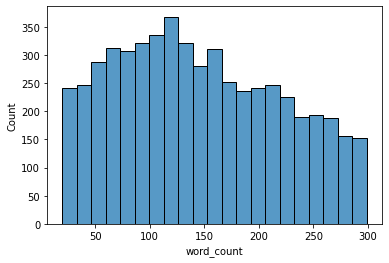

In [128]:
sns.histplot(data=dataset[dataset['word_count'] < 300], x='word_count');

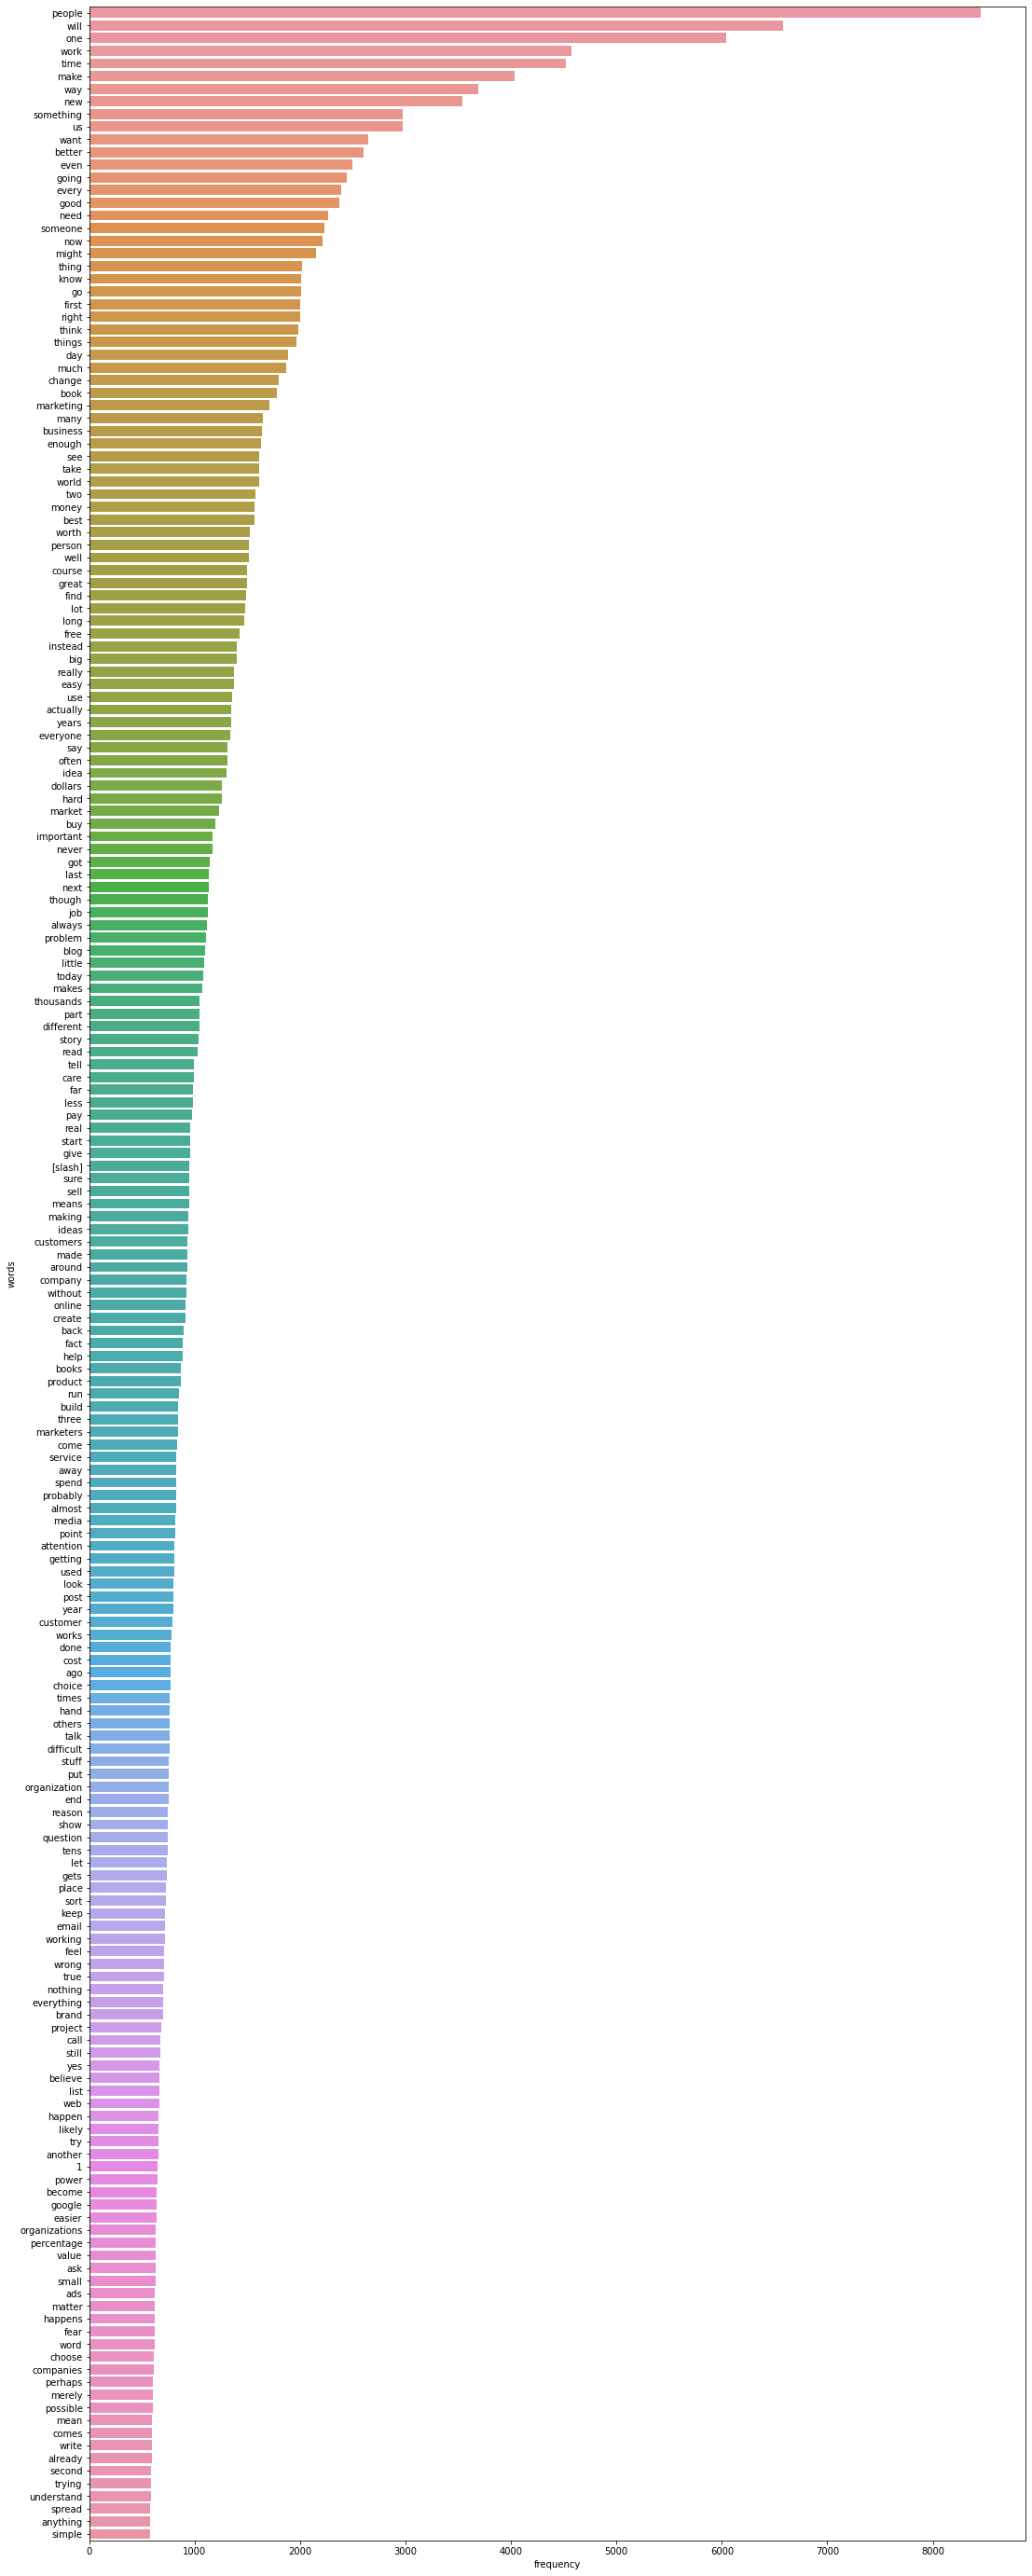

In [129]:
most_common_words_df = pd.DataFrame(vocabulary.most_common(200), columns=['words', 'frequency'])

plt.figure(figsize=(18, 50))

sns.barplot(
    data=most_common_words_df,
    x='frequency',
    y='words',
);

## Ngram Analysis

In [130]:
def generate_ngrams(text, n_gram=1):
    tokens = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[tokens[i:] for i in range(n_gram)])
    
    return [' '.join(ngram) for ngram in ngrams]

In [131]:
twograms = Counter()

for sample in dataset['content_plain'].values:
    twograms.update(generate_ngrams(sample, n_gram=2))

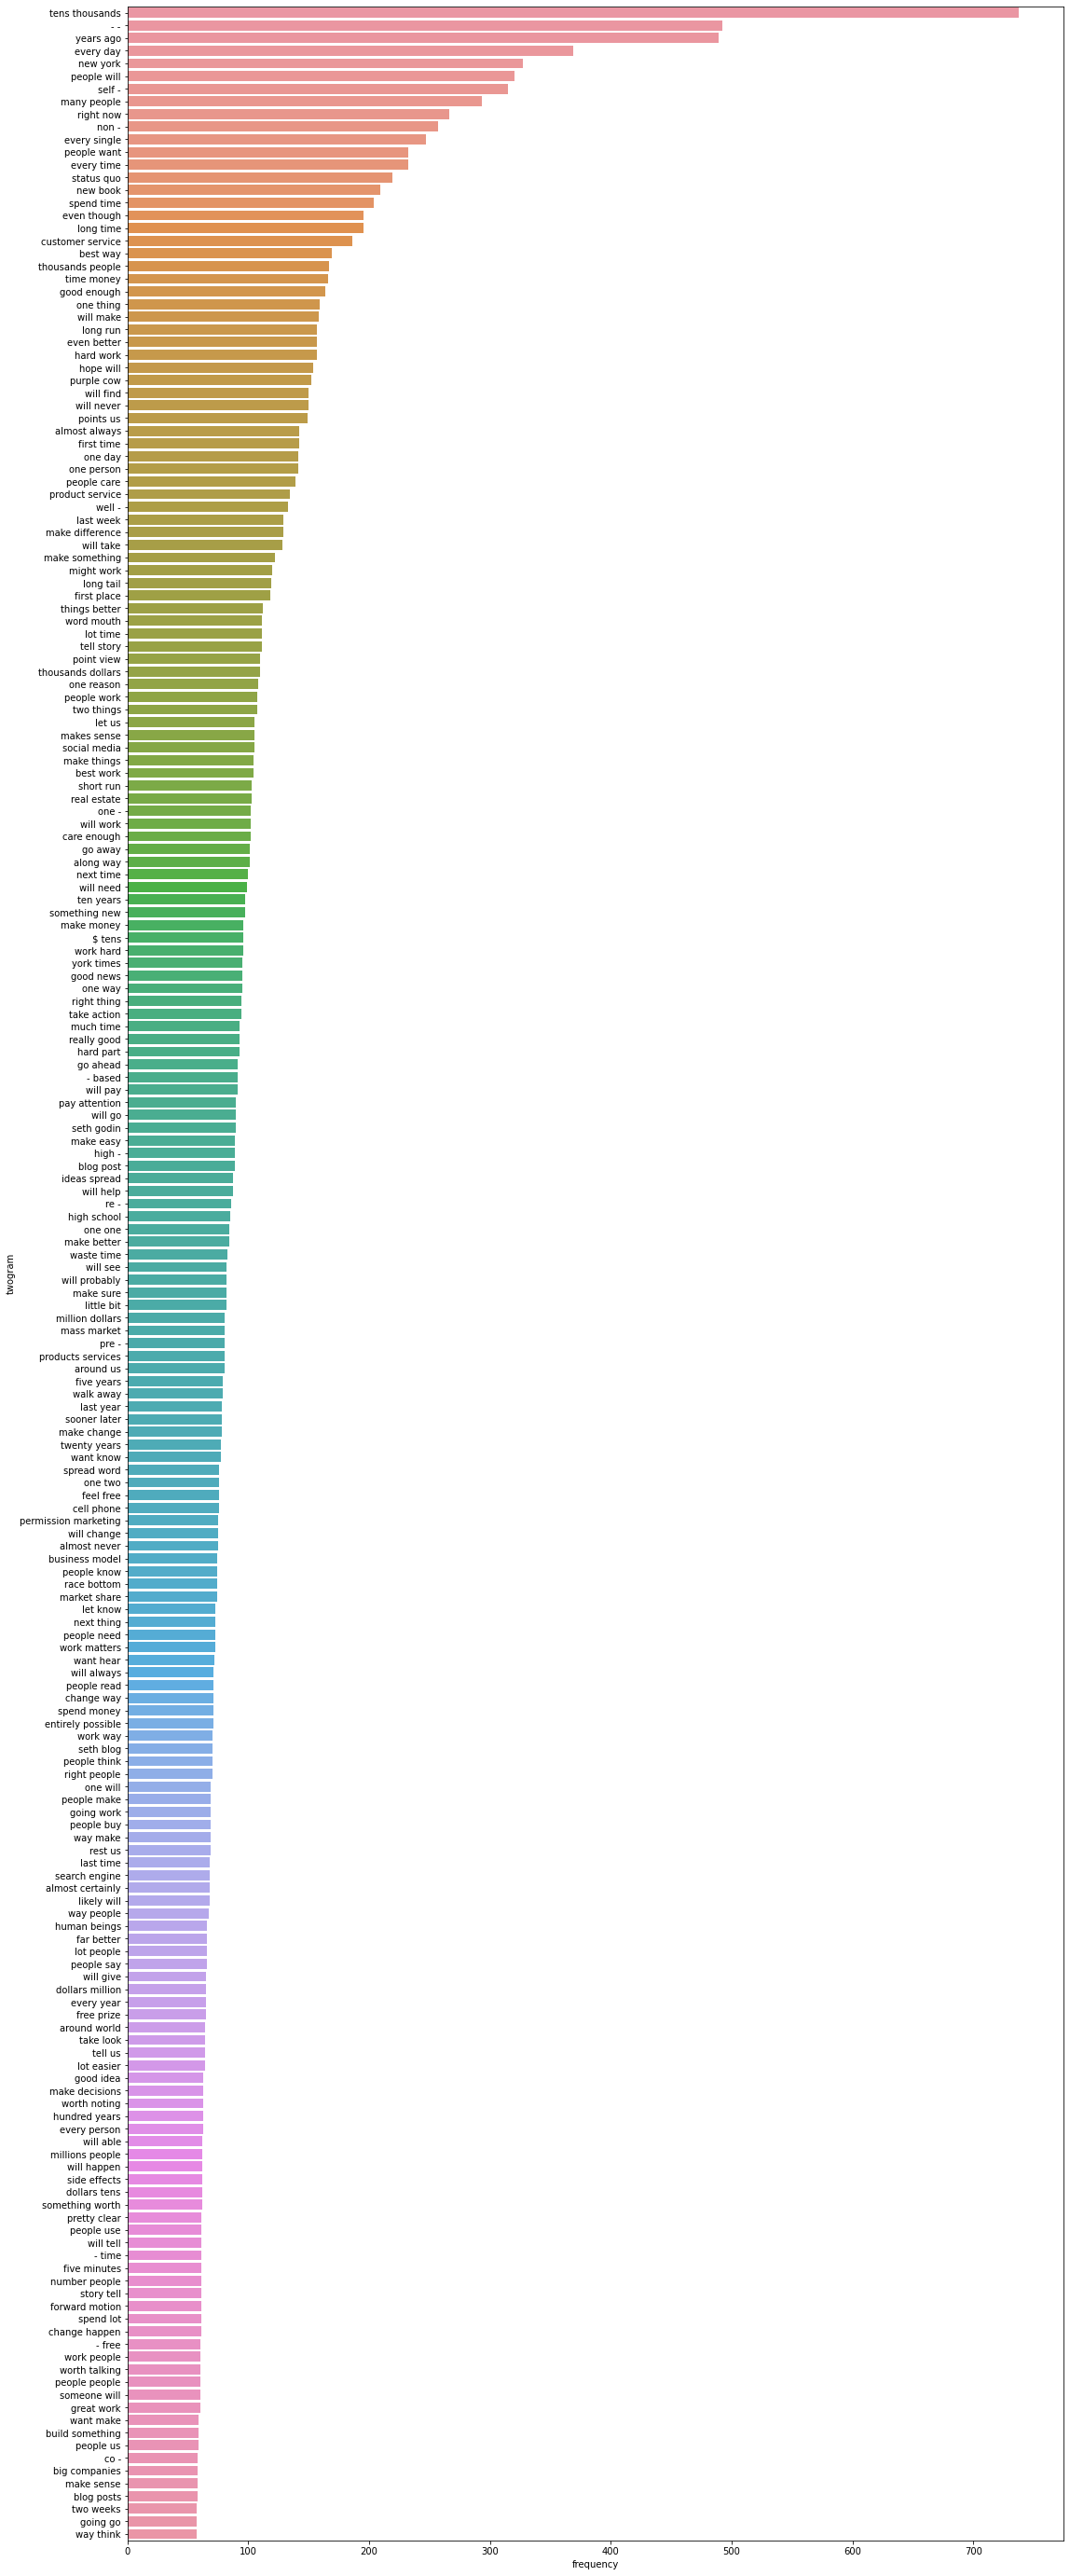

In [132]:
most_common_twograms_df = pd.DataFrame(twograms.most_common(200), columns=['twogram', 'frequency'])

plt.figure(figsize=(18, 50))

sns.barplot(
    data=most_common_twograms_df,
    x='frequency',
    y='twogram',
);

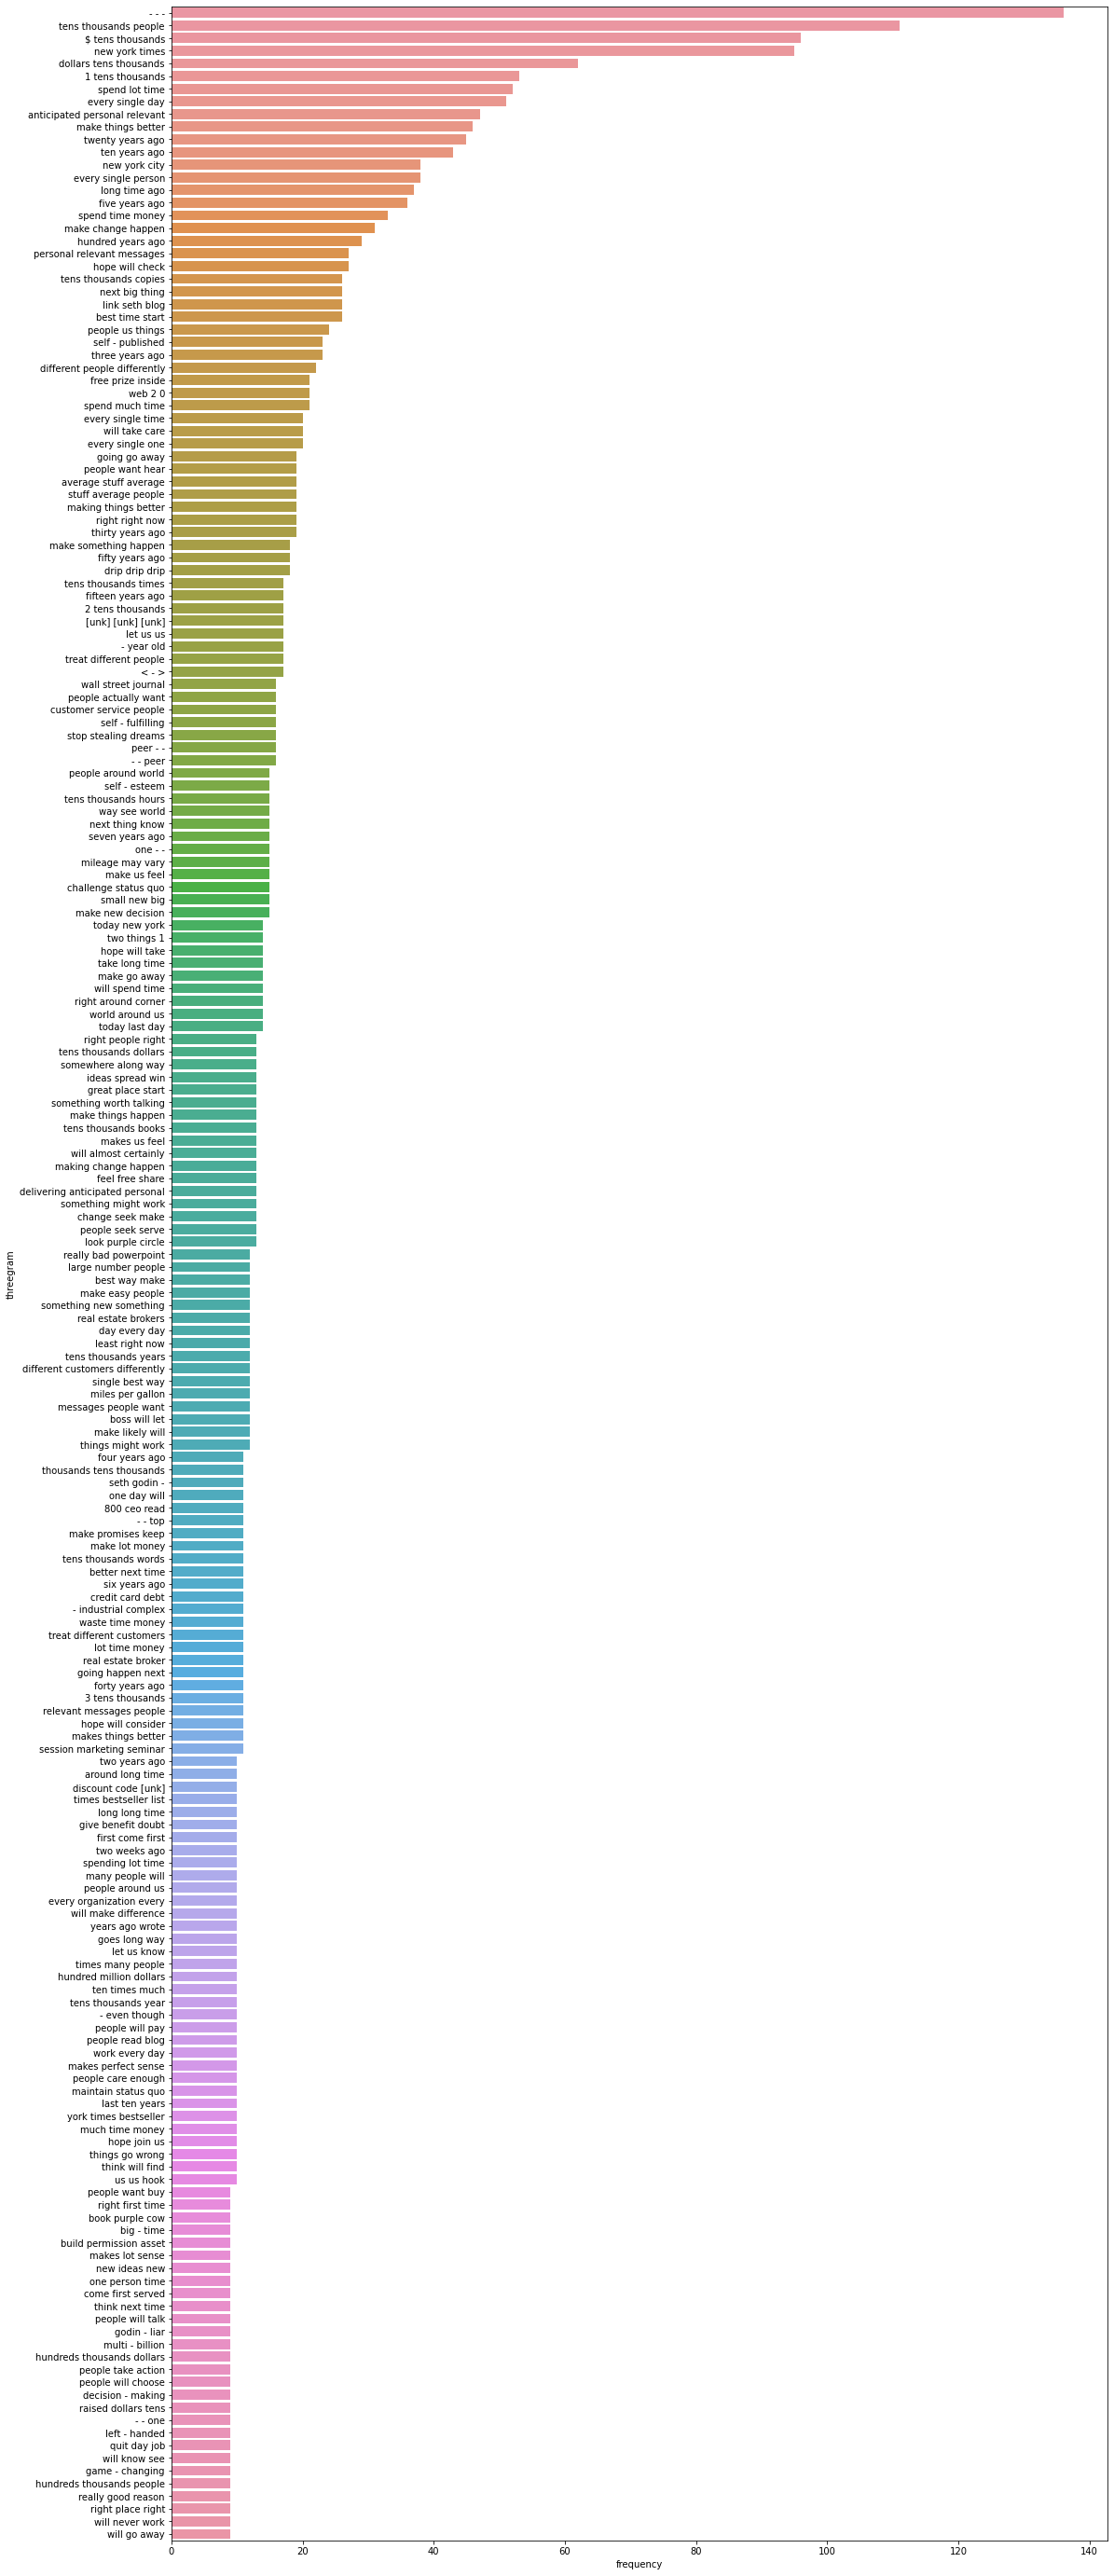

In [134]:
threegrams = Counter()

for sample in dataset['content_plain'].values:
    threegrams.update(generate_ngrams(sample, n_gram=3))
    
most_common_threegram_df = pd.DataFrame(threegrams.most_common(200), columns=['threegram', 'frequency'])

plt.figure(figsize=(18, 50))

sns.barplot(
    data=most_common_threegram_df,
    x='frequency',
    y='threegram',
);

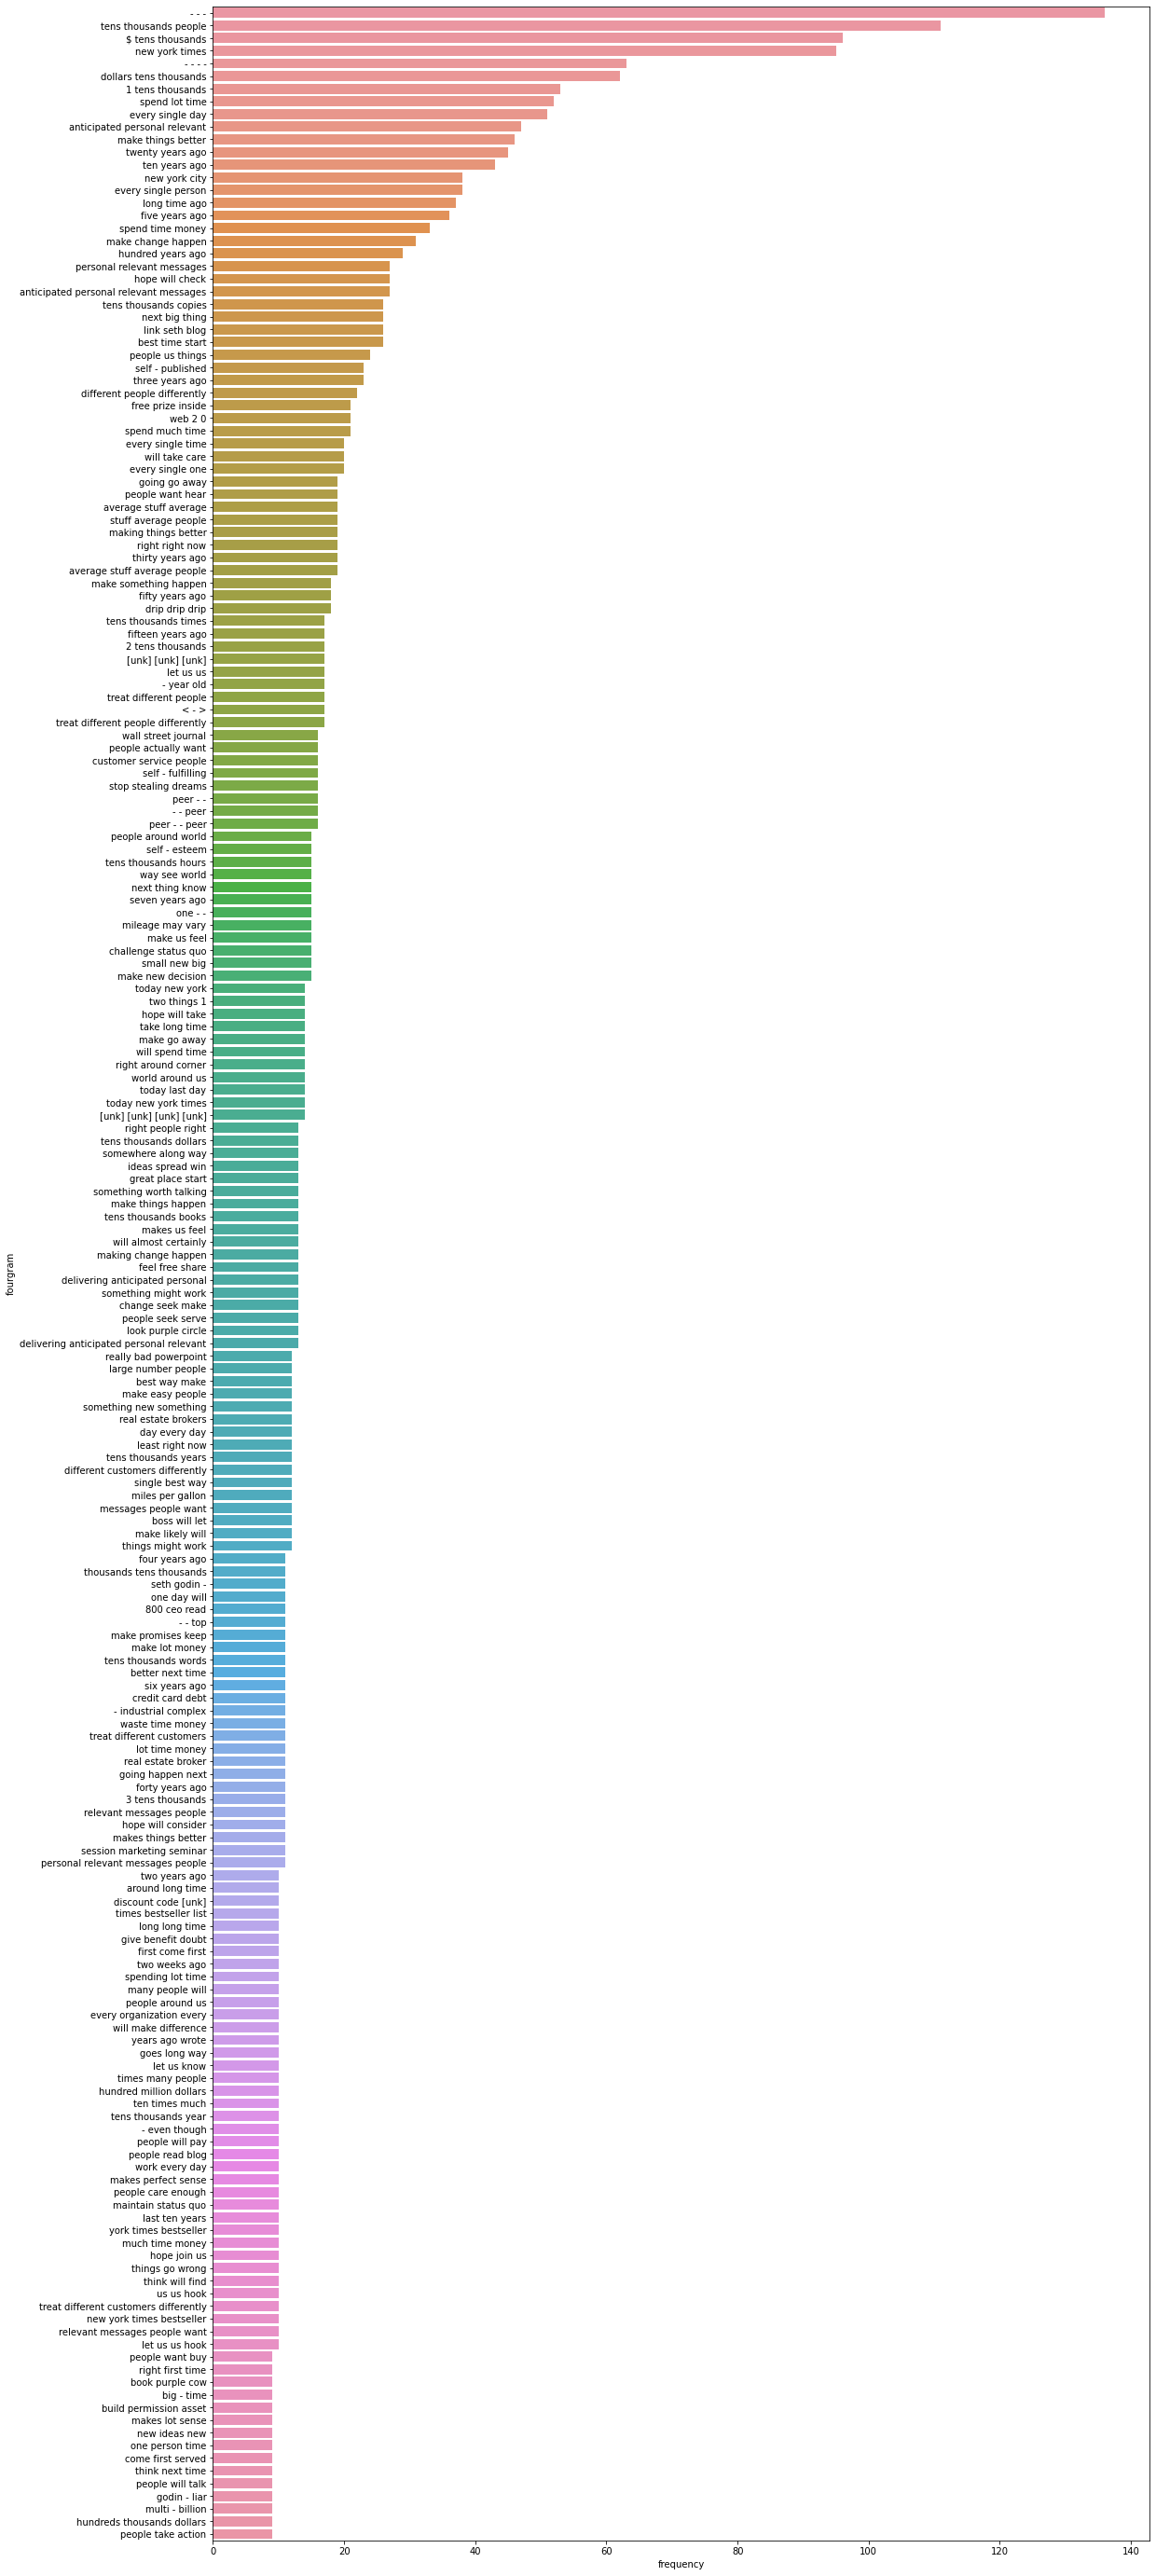

In [137]:
fourgrams = Counter()

for sample in dataset['content_plain'].values:
    fourgrams.update(generate_ngrams(sample, n_gram=4))
    
most_common_fourgrams_df = pd.DataFrame(fourgrams.most_common(200), columns=['fourgram', 'frequency'])

plt.figure(figsize=(18, 50))

sns.barplot(
    data=most_common_fourgrams_df,
    x='frequency',
    y='fourgram',
);

In [135]:
dataset.to_csv('../data/clean_dataset.csv', index=False)